In [19]:
import pandas as pd
import numpy as np

subpath = "distrib_tptt_experiment_y_original/2025-01-20T17:47:12"
data = pd.read_csv(f'{subpath}/minimal_with_univariate.csv', index_col=False)


In [20]:
data

,período,função,carga,apps,método,nmae
0,256,FlashcrowdLoad,BothApps,DispFrames,RT,0.236960
1,256,FlashcrowdLoad,BothApps,DispFrames,RF,0.216456
2,128,FlashcrowdLoad,BothApps,DispFrames,RT,0.081565
3,128,FlashcrowdLoad,BothApps,DispFrames,RF,0.089821
4,64,FlashcrowdLoad,BothApps,DispFrames,RT,0.117647
5,64,FlashcrowdLoad,BothApps,DispFrames,RF,0.121677
6,32,FlashcrowdLoad,BothApps,DispFrames,RT,0.129707
7,32,FlashcrowdLoad,BothApps,DispFrames,RF,0.125198
8,16,FlashcrowdLoad,BothApps,DispFrames,RT,0.098664
9,16,FlashcrowdLoad,BothApps,DispFrames,RF,0.102216


In [21]:
group = data.groupby(["período"])['nmae'].agg(['mean', 'std']).reset_index()

In [22]:
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [23]:
group

,período,mean,std
0,8,10.0,2.0
1,16,11.0,2.0
2,32,12.0,3.0
3,64,12.0,1.0
4,128,13.0,5.0
5,256,16.0,6.0


In [24]:
new_data = pd.DataFrame({'período': [1], 'mean': [12], 'std': [2]})

total_table = pd.concat([group, new_data], ignore_index=True)


In [25]:
total_table.set_index('período', inplace=True)

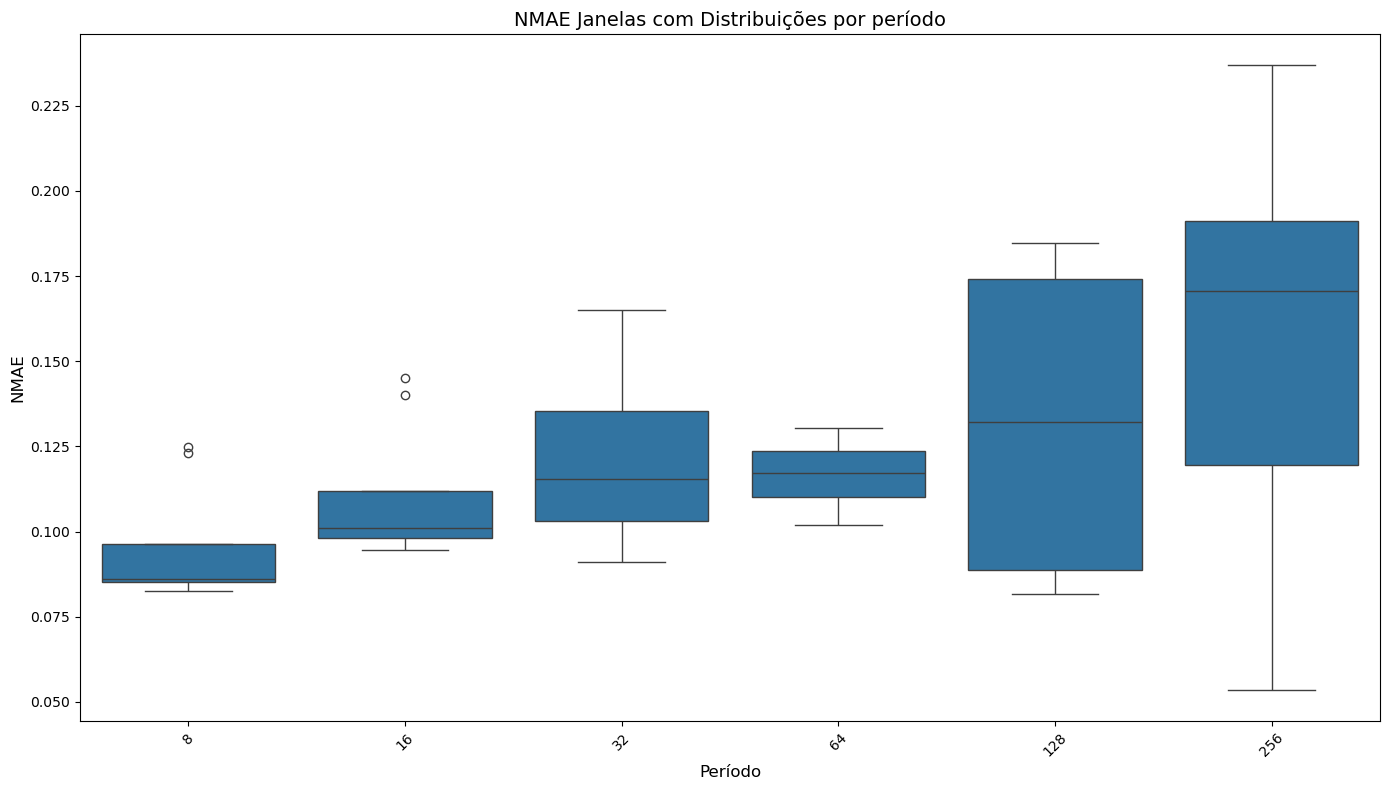

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data)

plt.xlabel("Período", fontsize=12)
plt.ylabel("NMAE", fontsize=12)
plt.title("NMAE Janelas com Distribuições TPTT por período", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [27]:
group_by_method = data.groupby(["período", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [28]:
group_by_method['std'] = round(100*group_by_method['std'], 0)
group_by_method['mean'] = round(100*group_by_method['mean'], 0)

In [29]:
group_by_method

,período,método,mean,std
0,8,RF,10.0,2.0
1,8,RT,9.0,2.0
2,16,RF,11.0,2.0
3,16,RT,11.0,2.0
4,32,RF,12.0,3.0
5,32,RT,12.0,3.0
6,64,RF,12.0,1.0
7,64,RT,12.0,1.0
8,128,RF,13.0,5.0
9,128,RT,13.0,5.0


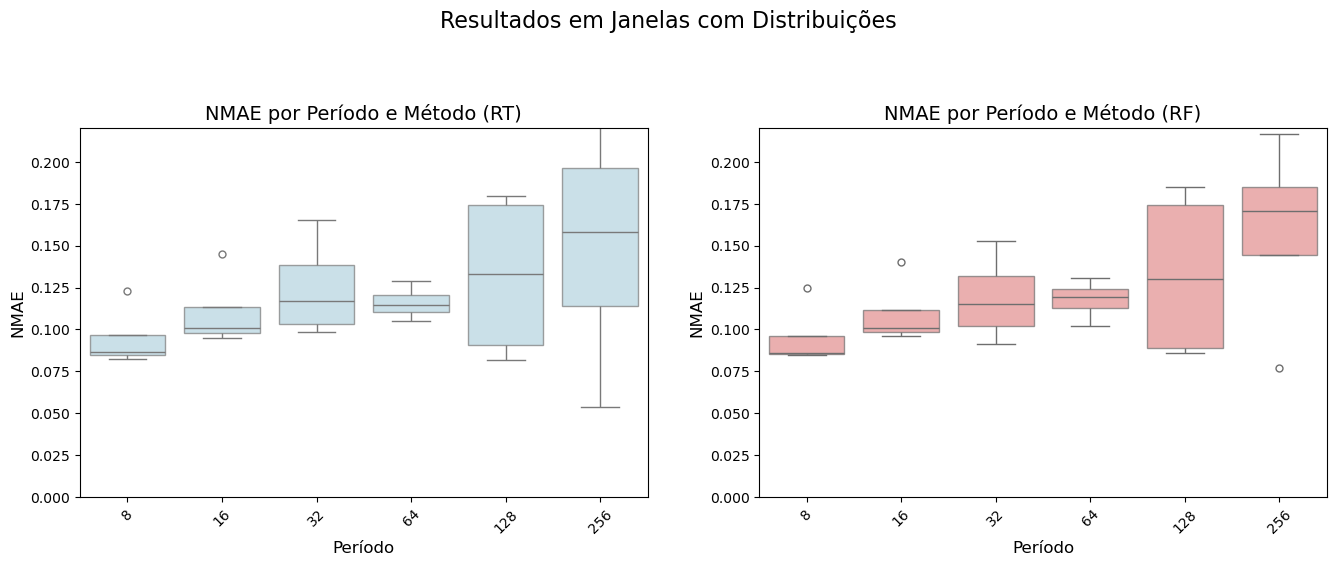

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.22)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RT'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Método (RT)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RF'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Método (RF)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados em Janelas com Distribuições TPTT", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()
